In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('customer_churn_dataset.csv')

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
dataset = df.iloc[:,1:]

In [6]:
dataset.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [7]:
# Age = StandardScaler
# Tenure = StandardScaler
# Usage Frequency = StandardScaler 
# Support Calls = RobustScaler
# Payment Delay = StandardScaler
# Total Spend = MinMaxScaler (200-800 range is high compare to other columns)
# Last Interaction = StandardScaler
# Gender = nominal
# Subscription Type = ordinal
# Contract Length = ordinal
# Churn = LabelScaler (already in numerical so not need to apply any scaler if it was categorical so then we needed to apply 'Label Scaler' )

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                64374 non-null  int64 
 1   Gender             64374 non-null  object
 2   Tenure             64374 non-null  int64 
 3   Usage Frequency    64374 non-null  int64 
 4   Support Calls      64374 non-null  int64 
 5   Payment Delay      64374 non-null  int64 
 6   Subscription Type  64374 non-null  object
 7   Contract Length    64374 non-null  object
 8   Total Spend        64374 non-null  int64 
 9   Last Interaction   64374 non-null  int64 
 10  Churn              64374 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 5.4+ MB


In [9]:
dataset.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

<h1>Ploting the Data</h1>

<h2># Univariate plot for each column</h2>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age'>

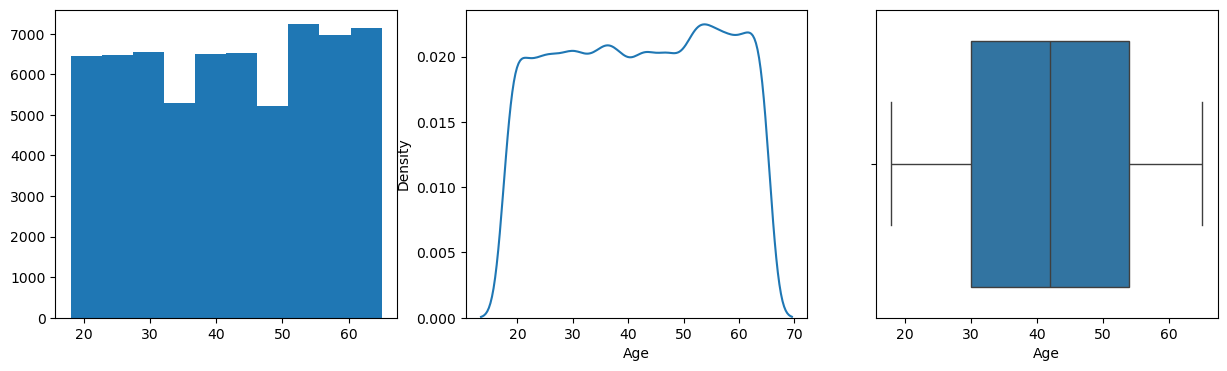

In [11]:
# Age
fig, (a1,a2,a3) = plt.subplots(ncols=3, figsize=(15,4))

a1.hist(dataset['Age'])
sns.kdeplot(dataset['Age'],ax=a2)
sns.boxplot(x=dataset['Age'],ax=a3)

<Axes: xlabel='Tenure'>

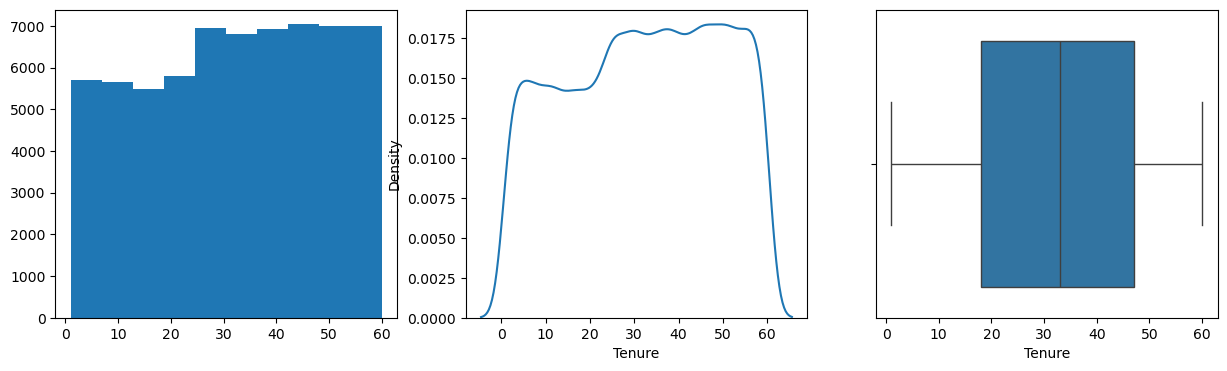

In [12]:
# Tenure
fig, (a1,a2,a3) = plt.subplots(ncols=3, figsize=(15,4))

a1.hist(dataset['Tenure'])
sns.kdeplot(dataset['Tenure'],ax=a2)
sns.boxplot(x=dataset['Tenure'],ax=a3)

<Axes: xlabel='Usage Frequency'>

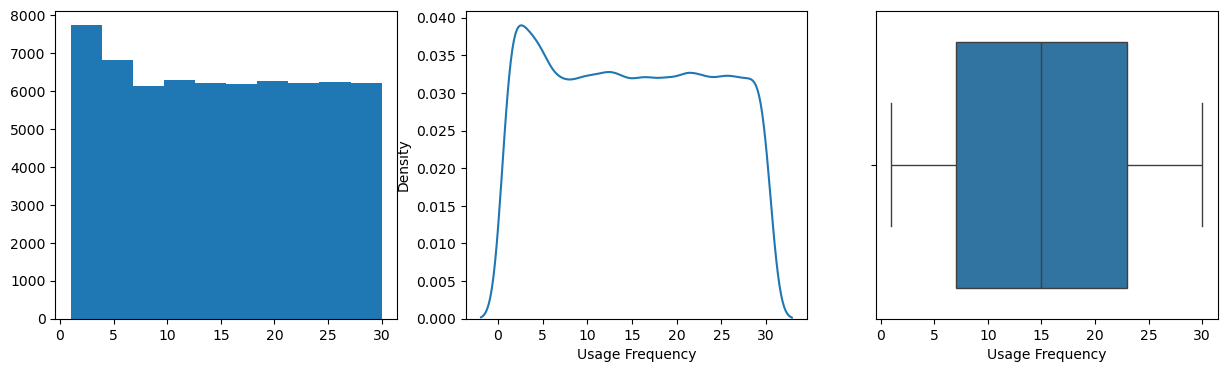

In [13]:
# Usage Frequency
fig, (a1,a2,a3) = plt.subplots(ncols=3, figsize=(15,4))

a1.hist(dataset['Usage Frequency'])
sns.kdeplot(dataset['Usage Frequency'],ax=a2)
sns.boxplot(x=dataset['Usage Frequency'],ax=a3)

<Axes: xlabel='Support Calls'>

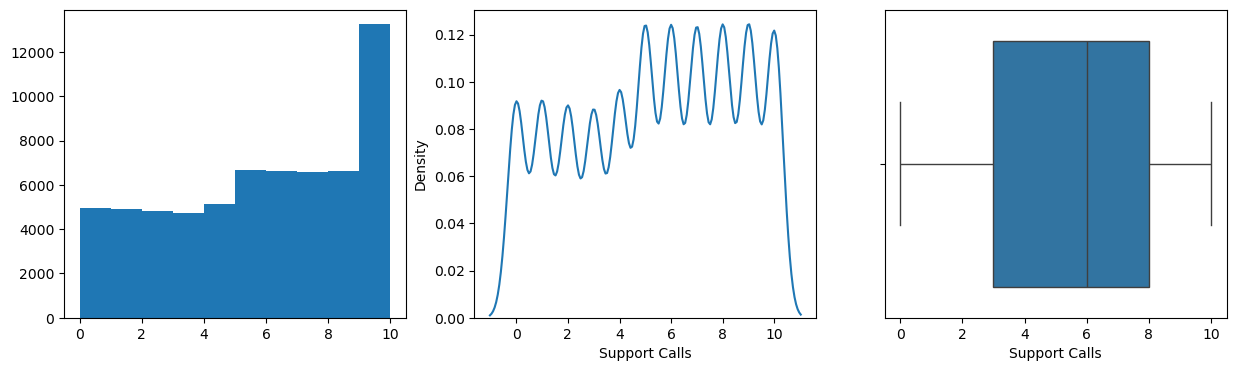

In [14]:
# Support Calls
fig, (a1,a2,a3) = plt.subplots(ncols=3, figsize=(15,4))

a1.hist(dataset['Support Calls'])
sns.kdeplot(dataset['Support Calls'],ax=a2)
sns.boxplot(x=dataset['Support Calls'],ax=a3)

<Axes: xlabel='Payment Delay'>

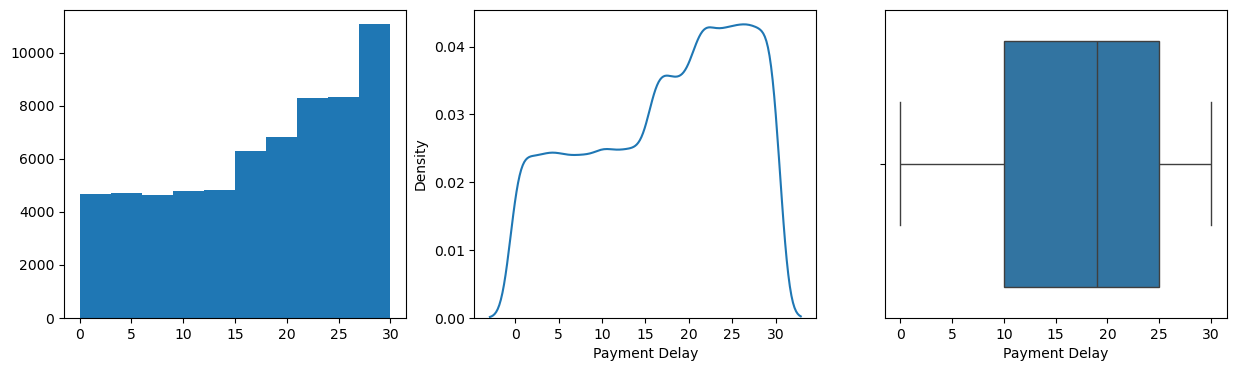

In [15]:
# Payment Delay	
fig, (a1,a2,a3) = plt.subplots(ncols=3, figsize=(15,4))

a1.hist(dataset['Payment Delay'])
sns.kdeplot(dataset['Payment Delay'],ax=a2)
sns.boxplot(x=dataset['Payment Delay'],ax=a3)

<Axes: xlabel='Total Spend'>

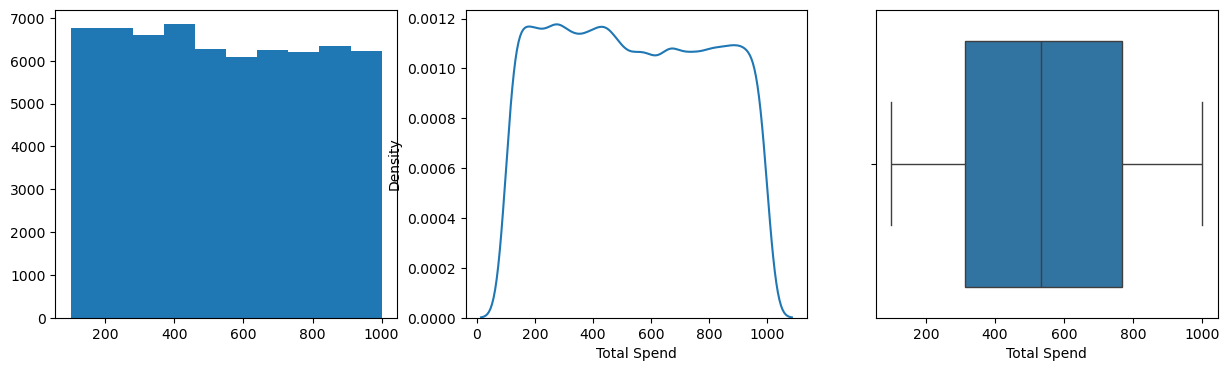

In [16]:
# Total Spend	
fig, (a1,a2,a3) = plt.subplots(ncols=3, figsize=(15,4))

a1.hist(dataset['Total Spend'])
sns.kdeplot(dataset['Total Spend'],ax=a2)
sns.boxplot(x=dataset['Total Spend'],ax=a3)

<Axes: xlabel='Last Interaction'>

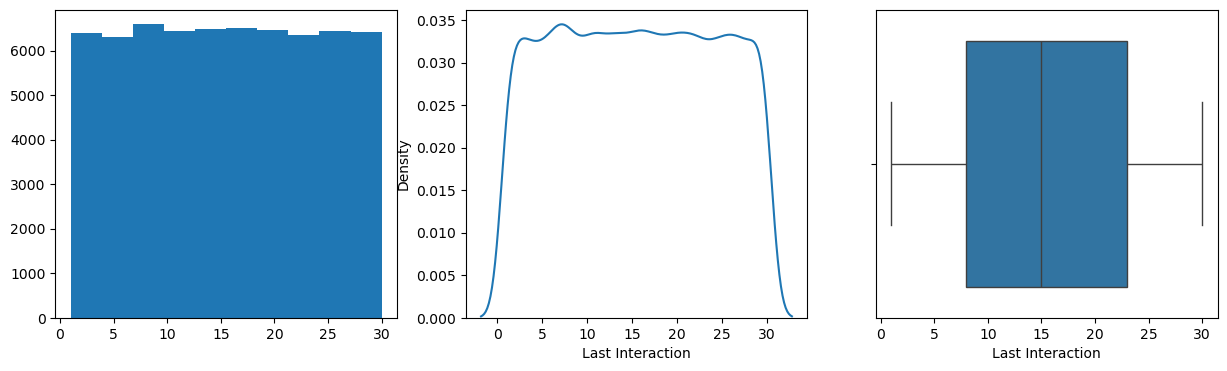

In [17]:
# Last Interaction
fig, (a1,a2,a3) = plt.subplots(ncols=3, figsize=(15,4))

a1.hist(dataset['Last Interaction'])
sns.kdeplot(dataset['Last Interaction'],ax=a2)
sns.boxplot(x=dataset['Last Interaction'],ax=a3)

<Axes: xlabel='Gender', ylabel='count'>

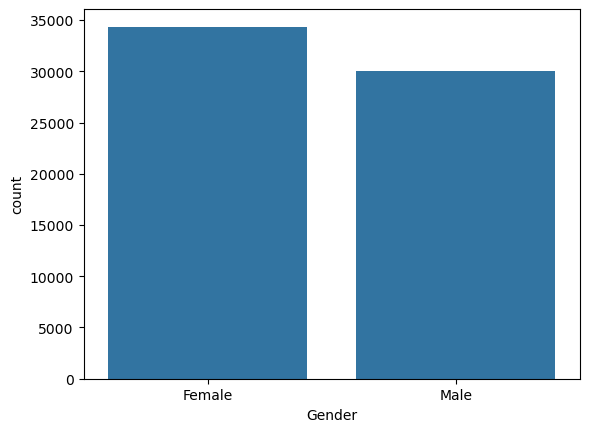

In [18]:
# Gender
sns.countplot(x=dataset['Gender'])

<Axes: xlabel='Subscription Type', ylabel='count'>

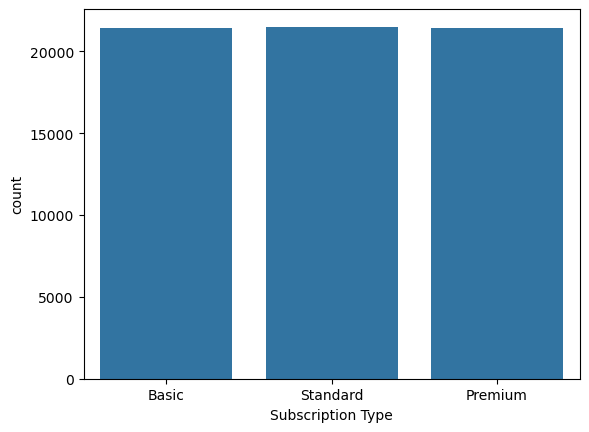

In [19]:
# Subscription Type
sns.countplot(x=dataset['Subscription Type'])

<Axes: xlabel='Contract Length', ylabel='count'>

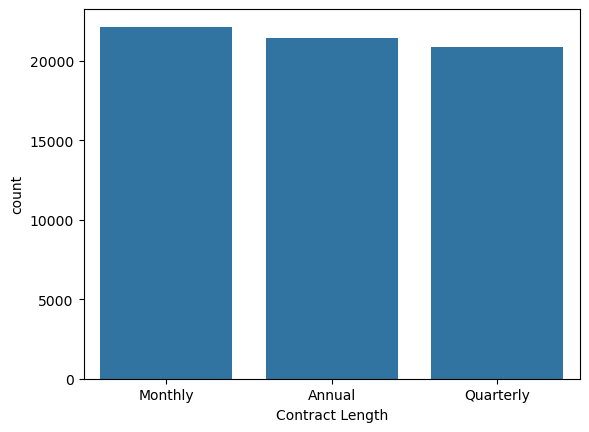

In [20]:
# Contract Length	
sns.countplot(x=dataset['Contract Length'])

In [21]:
dataset.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


<h2>#Multivariate plots </h2>

<h3>A. Numerical + Target column</h3>

<Axes: xlabel='Churn', ylabel='Age'>

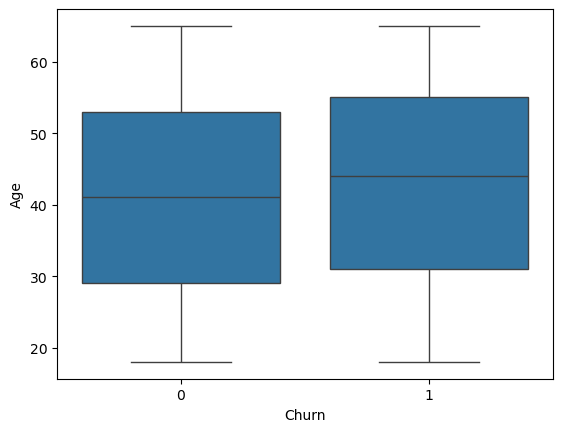

In [22]:
# Age + Churn
sns.boxplot(x='Churn', y='Age', data=dataset)

<Axes: xlabel='Churn', ylabel='Tenure'>

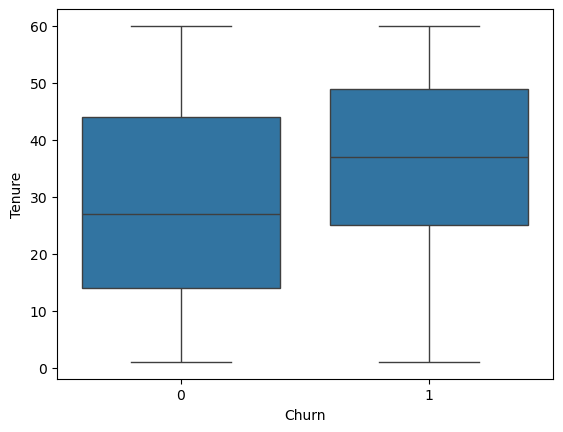

In [23]:
# Tenure + Churn
sns.boxplot(x='Churn', y='Tenure', data=dataset)

<Axes: xlabel='Churn', ylabel='Usage Frequency'>

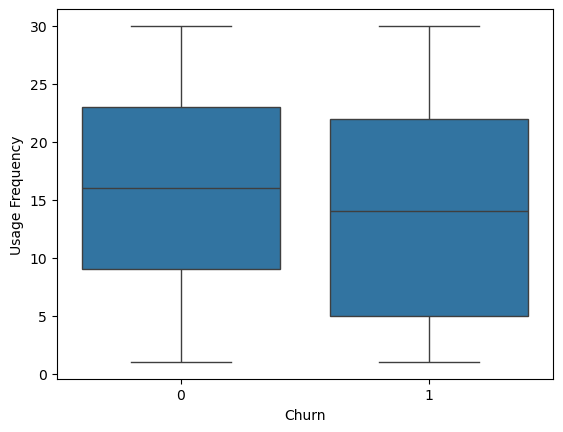

In [24]:
# Usage Frequency + Churn
sns.boxplot(x='Churn', y='Usage Frequency', data=dataset)

<Axes: xlabel='Churn', ylabel='Support Calls'>

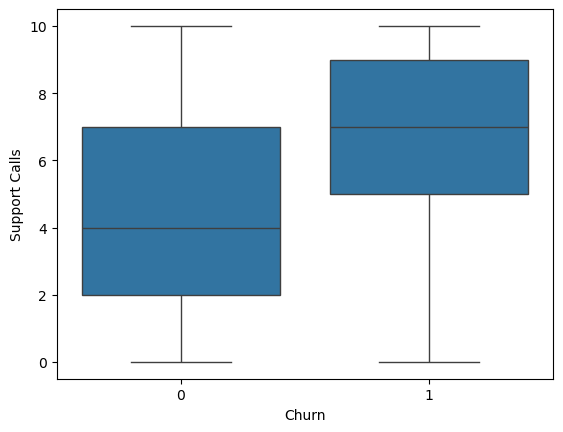

In [25]:
# Support Calls + Churn
sns.boxplot(x='Churn', y='Support Calls', data=dataset)

<Axes: xlabel='Churn', ylabel='Payment Delay'>

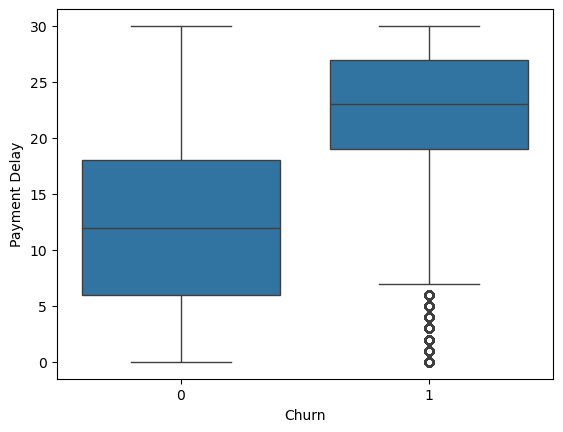

In [26]:
# Payment Delay + Churn
sns.boxplot(x='Churn', y='Payment Delay', data=dataset)

<Axes: xlabel='Churn', ylabel='Total Spend'>

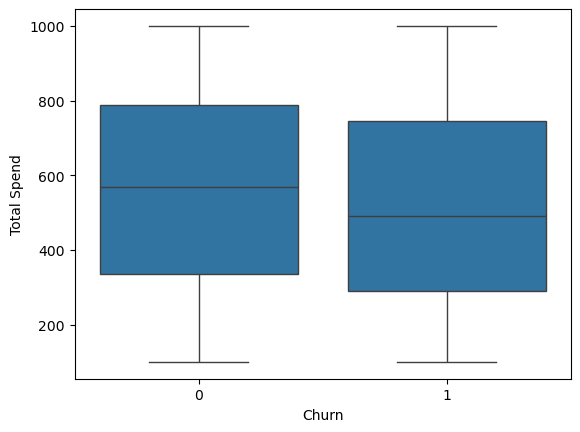

In [27]:
# Total Spend + Churn
sns.boxplot(x='Churn', y='Total Spend', data=dataset)

<Axes: xlabel='Churn', ylabel='Last Interaction'>

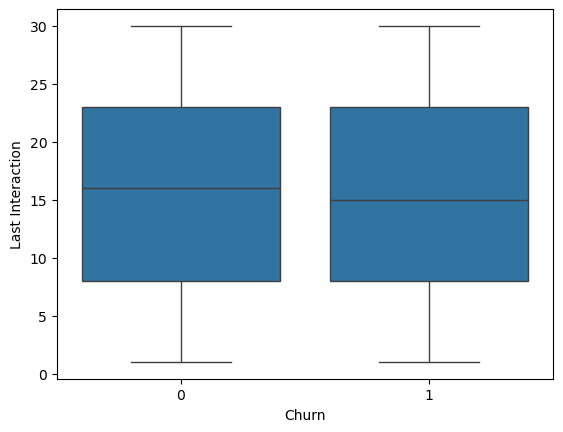

In [28]:
# Last Interaction + Churn
sns.boxplot(x='Churn', y='Last Interaction', data=dataset)

<h3>B. Categorical + Target column</h3>

<Axes: xlabel='Subscription Type', ylabel='count'>

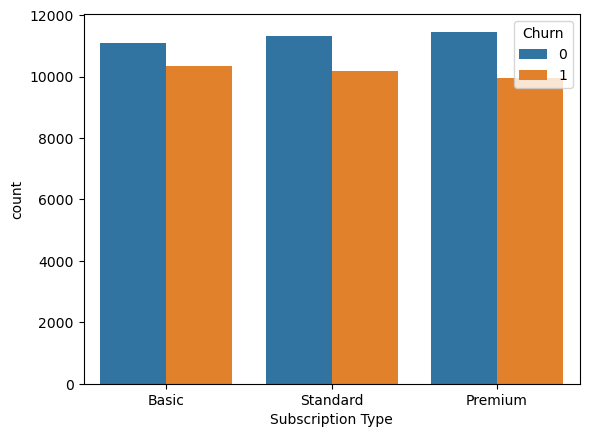

In [29]:
# Subscription Type + Churn
sns.countplot(x='Subscription Type', hue='Churn', data=dataset)

<Axes: xlabel='Gender', ylabel='count'>

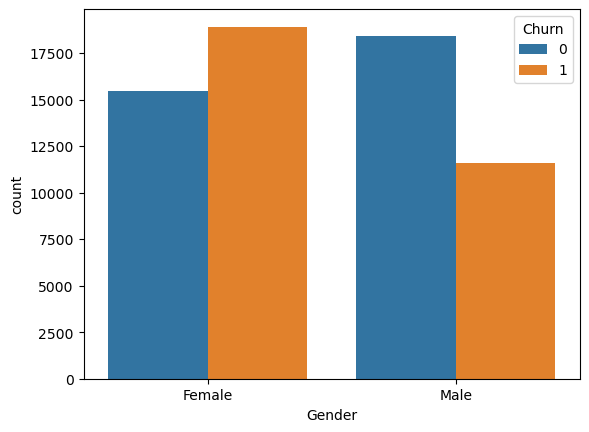

In [30]:
# Gender + Churn
sns.countplot(x='Gender', hue='Churn', data=dataset)

<Axes: xlabel='Contract Length', ylabel='count'>

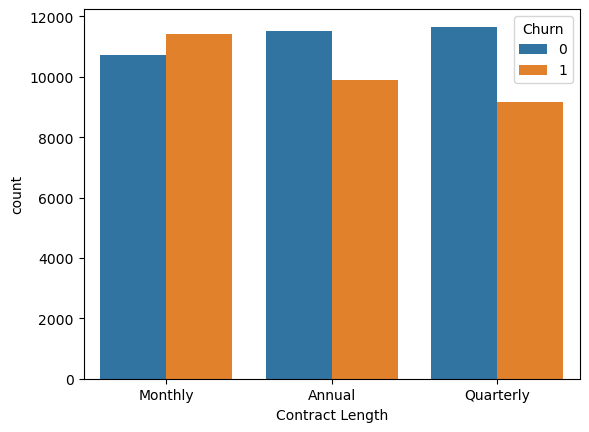

In [31]:
# Contract Length + Churn
sns.countplot(x='Contract Length', hue='Churn', data=dataset)

<h3>C. Numerical + Numerical (Relationships)</h3>

<Axes: xlabel='Tenure', ylabel='Total Spend'>

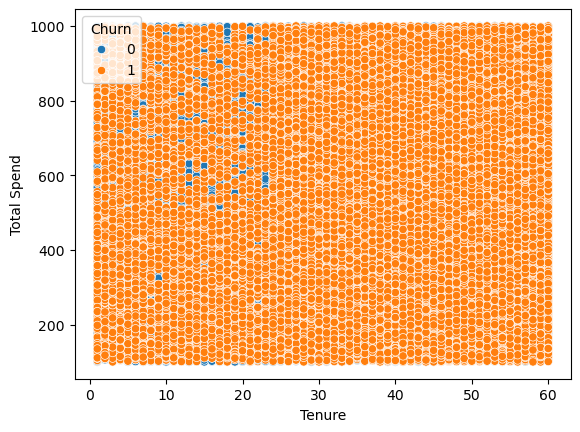

In [32]:
# Tenure + Total Spend
sns.scatterplot(x='Tenure', y='Total Spend', hue='Churn',data=dataset)

<Axes: xlabel='Age', ylabel='Total Spend'>

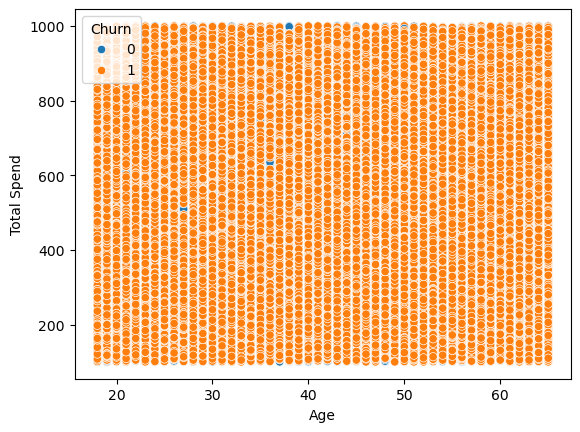

In [33]:
# Age + Total Spend
sns.scatterplot(x='Age', y='Total Spend',hue='Churn',data=dataset)

<Axes: xlabel='Tenure', ylabel='Usage Frequency'>

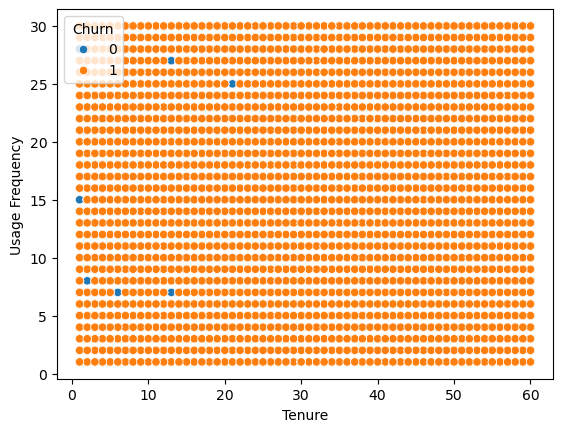

In [34]:
# Tenure + Usage Frequency
sns.scatterplot(x='Tenure', y='Usage Frequency', hue='Churn',data=dataset)

In [35]:
dataset.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


<h1>Feature Engineering (Preprocessing)</h1>

In [36]:
# Age = StandardScaler
# Tenure = StandardScaler
# Usage Frequency = StandardScaler 
# Support Calls = RobustScaler
# Payment Delay = StandardScaler
# Total Spend = MinMaxScaler (200-800 range is high compare to other columns)
# Last Interaction = StandardScaler
# Gender = nominal
# Subscription Type = ordinal
# Contract Length = ordinal
# Churn = LabelScaler (already in numerical so not need to apply any scaler if it was categorical so then we needed to apply 'Label Scaler' )

In [37]:
dataset.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


<h1>Train Test Split</h1>

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(dataset.drop('Churn', axis=1),dataset['Churn'],test_size=0.3,random_state=0)
# x_train,x_test,y_train,y_test = train_test_split(dataset.drop('Churn', axis=1), dataset['Churn'], test_size=0.3, random_state=0)

In [39]:
x_train.shape, x_test.shape
x_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
58632,47,Female,38,14,10,19,Premium,Quarterly,674,7
37217,18,Male,20,2,3,14,Basic,Monthly,410,27
55686,25,Female,3,23,8,24,Premium,Quarterly,421,25
51992,43,Male,53,23,10,24,Premium,Monthly,813,29
18622,42,Female,29,12,6,14,Premium,Monthly,210,19


<h2># Using StandardScaler (Numerical column)</h2>

In [40]:
x_train_ns = x_train[['Age','Tenure','Usage Frequency','Payment Delay','Last Interaction']]
x_test_ns = x_test[['Age','Tenure','Usage Frequency','Payment Delay','Last Interaction']]

In [41]:
x_train_ns.shape

(45061, 5)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_ns)

x_train_ns_scaled = scaler.transform(x_train_ns)
x_test_ns_scaled = scaler.transform(x_test_ns)

In [43]:
x_train_ns_scaled = pd.DataFrame(x_train_ns_scaled, columns=x_train_ns.columns)
x_test_ns_scaled = pd.DataFrame(x_test_ns_scaled, columns=x_test_ns.columns)

In [44]:
x_train_ns_scaled.head()

,Age,Tenure,Usage Frequency,Payment Delay,Last Interaction
0,0.357693,0.347856,-0.128158,0.211863,-0.978986
1,-1.716124,-0.703496,-1.487896,-0.352580,1.329426
2,-1.215548,-1.696440,0.891646,0.776307,1.098585
3,0.071649,1.223982,0.891646,0.776307,1.560267
4,0.000138,-0.177820,-0.354781,-0.352580,0.406061


<Axes: title={'center': 'After'}, xlabel='Tenure', ylabel='Age'>

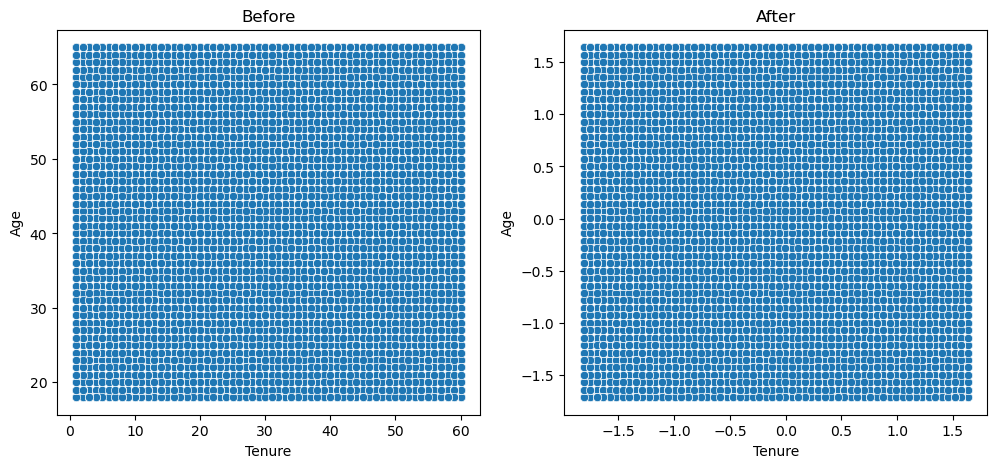

In [45]:
fig, (a1, a2) = plt.subplots(ncols=2, figsize=(12,5))

a1.set_title('Before')
sns.scatterplot(x='Tenure', y='Age',data=x_train, ax=a1)
a2.set_title('After')
sns.scatterplot(x='Tenure', y='Age',data=x_train_ns_scaled, ax=a2)

# as u can see the data before using standardscaler the ranges have huge difference of the given 2 columns but after they both come in one range
# “StandardScaler converts columns to mean=0 and standard deviation=1. This does not equalize the range, but it equalizes the center and spread,
# which helps the model treat both features fairly.”

<h2># Using RobustScaler (Numerical column)</h2>

In [46]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(x_train[['Support Calls']])

x_train_nr = scaler.transform(x_train[['Support Calls']])
x_test_nr = scaler.transform(x_test[['Support Calls']])

In [47]:
x_train_nr = pd.DataFrame(x_train_nr, columns=['Support Calls'])
x_test_nr = pd.DataFrame(x_test_nr, columns=['Support Calls'])

In [48]:
x_train_nr.shape, x_test_nr.shape

((45061, 1), (19313, 1))

<Axes: title={'center': 'After'}, xlabel='Support Calls', ylabel='Density'>

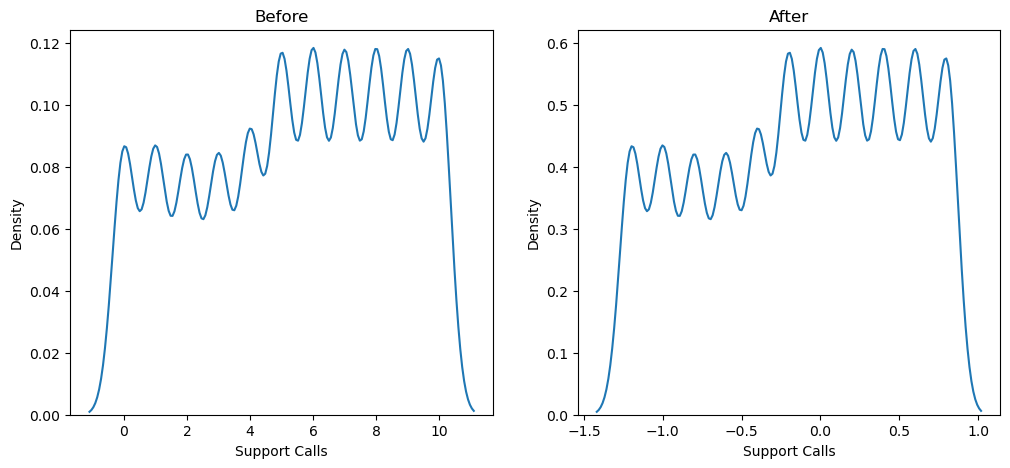

In [49]:
fig, (a1, a2) = plt.subplots(ncols=2, figsize=(12,5))

a1.set_title('Before')
sns.kdeplot(x_train['Support Calls'],ax=a1)
a2.set_title('After')
sns.kdeplot(x_train_nr['Support Calls'],ax=a2)
# sns.scatterplot(x=x_train['Support Calls'], y=x_train['Tenure'], ax=a1)
# sns.scatterplot(x=x_train_nr['Support Calls'], y=x_train['Tenure'], ax=a2)

<h2>#Using MinMaxScaler (Numerical column)</h2>

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train[['Total Spend']])

x_train_nm = scaler.transform(x_train[['Total Spend']])
x_test_nm = scaler.transform(x_test[['Total Spend']])

In [51]:
x_train_nm = pd.DataFrame(x_train_nm, columns=['Total Spend'])
x_test_nm = pd.DataFrame(x_test_nm, columns=['Total Spend'])

In [52]:
x_train_nm.shape, x_test_nm.shape

((45061, 1), (19313, 1))

(array([4733., 4750., 4690., 4792., 4321., 4265., 4385., 4302., 4499.,
        4324.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

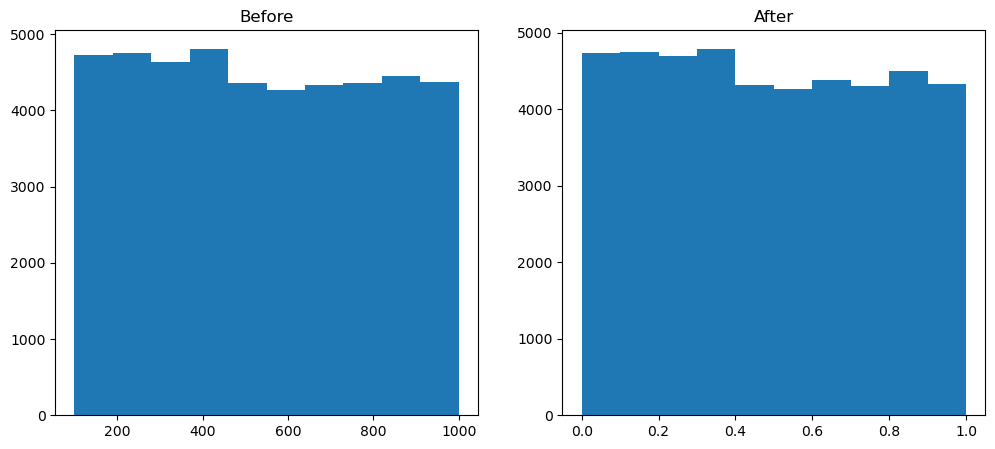

In [53]:
fig, (a1, a2) = plt.subplots(ncols=2, figsize=(12,5))

a1.set_title('Before')
a1.hist(x_train['Total Spend'])
a2.set_title('After')
a2.hist(x_train_nm['Total Spend'])

# u can obser that scale after encoding as come in a range with other columns 

<h2>#Using Nominal Encoding (Categorical column)</h2>

In [54]:
from sklearn.preprocessing import OneHotEncoder

scaler = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

x_train_ohe = scaler.fit_transform(x_train[['Gender']])
x_test_ohe = scaler.transform(x_test[['Gender']])

In [55]:
x_train_ohe = pd.DataFrame(x_train_ohe, columns=['Gender'])
x_test_ohe = pd.DataFrame(x_test_ohe, columns=['Gender'])

In [56]:
x_test_ohe

,Gender
0,0
1,1
2,0
3,0
4,0
...,...
19308,1
19309,0
19310,0
19311,1


<h2>#Using Ordinal Encoding (Categorical column)</h2>

In [57]:
# x_train['Subscription Type'].value_counts()
x_train['Contract Length'].value_counts()

Contract Length
Monthly      15566
Annual       15047
Quarterly    14448
Name: count, dtype: int64

In [58]:
from sklearn.preprocessing import OrdinalEncoder

scaler = OrdinalEncoder(categories=[
    ['Basic','Standard','Premium'],
    ['Monthly','Quarterly','Annual']
])

scaler.fit(x_train[['Subscription Type','Contract Length']])

x_train_oe = scaler.transform(x_train[['Subscription Type','Contract Length']]).astype(int)
x_test_oe = scaler.transform(x_test[['Subscription Type','Contract Length']]).astype(int)

In [59]:
x_train_oe = pd.DataFrame(x_train_oe, columns=['Subscription Type','Contract Length'])
x_test_oe = pd.DataFrame(x_test_oe, columns=['Subscription Type','Contract Length'])

In [60]:
x_train_oe

,Subscription Type,Contract Length
0,2,1
1,0,0
2,2,1
3,2,0
4,2,0
...,...,...
45056,2,0
45057,2,0
45058,0,1
45059,1,0


<h1>Merging all the DataFrames(tables) which are scaled or encoded</h1>

In [61]:
x_train_final = np.concat([
    x_train_ns_scaled,
    x_train_nr,
    x_train_nm,
    x_train_ohe,
    x_train_oe 
],axis=1)

In [62]:
x_train_final = pd.DataFrame(x_train_final)

In [63]:
x_train_final

,0,1,2,3,4,5,6,7,8,9
0,0.357693,0.347856,-0.128158,0.211863,-0.978986,0.8,0.637778,0.0,2.0,1.0
1,-1.716124,-0.703496,-1.487896,-0.352580,1.329426,-0.6,0.344444,1.0,0.0,0.0
2,-1.215548,-1.696440,0.891646,0.776307,1.098585,0.4,0.356667,0.0,2.0,1.0
3,0.071649,1.223982,0.891646,0.776307,1.560267,0.8,0.792222,1.0,2.0,0.0
4,0.000138,-0.177820,-0.354781,-0.352580,0.406061,0.0,0.122222,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
45056,0.929780,-1.638031,-1.147962,1.002085,-0.978986,0.8,0.768889,0.0,2.0,0.0
45057,1.501868,-1.638031,-1.374585,1.227862,-0.286463,0.2,0.720000,1.0,2.0,0.0
45058,0.214671,-1.053947,0.211777,1.453640,1.214005,-0.6,0.003333,0.0,0.0,1.0
45059,-0.857993,0.055813,0.211777,1.340751,-1.440669,-0.4,0.596667,1.0,1.0,0.0


In [64]:
x_train_final = pd.concat([
    x_train_ns_scaled.reset_index(drop=True),
    x_train_nr.reset_index(drop=True),
    x_train_nm.reset_index(drop=True),
    x_train_ohe.reset_index(drop=True),
    x_train_oe.reset_index(drop=True) 
],axis=1)

display(x_train_final)

,Age,Tenure,Usage Frequency,Payment Delay,Last Interaction,Support Calls,Total Spend,Gender,Subscription Type,Contract Length
0,0.357693,0.347856,-0.128158,0.211863,-0.978986,0.8,0.637778,0,2,1
1,-1.716124,-0.703496,-1.487896,-0.352580,1.329426,-0.6,0.344444,1,0,0
2,-1.215548,-1.696440,0.891646,0.776307,1.098585,0.4,0.356667,0,2,1
3,0.071649,1.223982,0.891646,0.776307,1.560267,0.8,0.792222,1,2,0
4,0.000138,-0.177820,-0.354781,-0.352580,0.406061,0.0,0.122222,0,2,0
...,...,...,...,...,...,...,...,...,...,...
45056,0.929780,-1.638031,-1.147962,1.002085,-0.978986,0.8,0.768889,0,2,0
45057,1.501868,-1.638031,-1.374585,1.227862,-0.286463,0.2,0.720000,1,2,0
45058,0.214671,-1.053947,0.211777,1.453640,1.214005,-0.6,0.003333,0,0,1
45059,-0.857993,0.055813,0.211777,1.340751,-1.440669,-0.4,0.596667,1,1,0


In [65]:
x_test_final = pd.concat([
    x_test_ns_scaled.reset_index(drop=True),
    x_test_nr.reset_index(drop=True),
    x_test_nm.reset_index(drop=True),
    x_test_ohe.reset_index(drop=True),
    x_test_oe.reset_index(drop=True) 
],axis=1)

display(x_test_final)

,Age,Tenure,Usage Frequency,Payment Delay,Last Interaction,Support Calls,Total Spend,Gender,Subscription Type,Contract Length
0,1.430357,0.756715,0.325088,-1.029913,1.214005,0.4,0.592222,0,1,2
1,-0.500438,-0.411454,-1.374585,1.340751,0.175220,-0.2,0.577778,1,0,1
2,0.357693,0.523081,1.004957,1.453640,1.329426,0.8,0.932222,0,2,0
3,-0.786482,-0.236229,0.098465,-1.594357,-0.517304,0.8,0.592222,0,0,1
4,-0.643460,1.223982,0.438400,1.340751,0.521482,-1.2,0.050000,0,1,0
...,...,...,...,...,...,...,...,...,...,...
19308,1.001291,0.698306,1.344892,0.437641,0.406061,0.4,0.088889,1,1,2
19309,1.358846,-0.820313,-0.014846,-1.933023,0.406061,-0.2,0.374444,0,2,1
19310,0.786758,0.990348,0.438400,-1.933023,-1.094407,-0.4,0.828889,0,1,0
19311,-1.644613,1.574433,0.665023,1.227862,1.560267,0.8,0.423333,1,0,1


In [66]:
y_train = pd.DataFrame(y_train, columns=['Churn'])
y_test = pd.DataFrame(y_test, columns=['Churn'])

In [67]:
x_train.shape, x_test.shape

((45061, 10), (19313, 10))

In [68]:
x_train_final.shape, x_test_final.shape

((45061, 10), (19313, 10))

In [69]:
y_train.shape, y_test.shape

((45061, 1), (19313, 1))

In [70]:
x_train_final.shape, x_test_final.shape, y_train.shape, y_test.shape

((45061, 10), (19313, 10), (45061, 1), (19313, 1))

<h1>Logistic Regression </h1>

In [71]:
from sklearn.linear_model import LogisticRegression

data = LogisticRegression()

data.fit(x_train_final,y_train)

D:\ML\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [72]:
y_pred = data.predict(x_test_final)

In [73]:
y_pred = pd.DataFrame(y_pred, columns=['predicted Churn'])

In [74]:
y_pred

,predicted Churn
0,0
1,1
2,1
3,0
4,1
...,...
19308,1
19309,0
19310,0
19311,1


In [75]:
# from sklearn.metrics import accuracy_score

# print('accuracy score',accuracy_score(y_test,y_pred))


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8269559364158857
Confusion Matrix:
 [[8363 1800]
 [1542 7608]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     10163
           1       0.81      0.83      0.82      9150

    accuracy                           0.83     19313
   macro avg       0.83      0.83      0.83     19313
weighted avg       0.83      0.83      0.83     19313



In [76]:
combine = pd.concat([
    x_test_final.reset_index(drop=True),
    y_test.reset_index(drop=True),
    y_pred
],axis=1)

display(combine)

,Age,Tenure,Usage Frequency,Payment Delay,Last Interaction,Support Calls,Total Spend,Gender,Subscription Type,Contract Length,Churn,predicted Churn
0,1.430357,0.756715,0.325088,-1.029913,1.214005,0.4,0.592222,0,1,2,0,0
1,-0.500438,-0.411454,-1.374585,1.340751,0.175220,-0.2,0.577778,1,0,1,1,1
2,0.357693,0.523081,1.004957,1.453640,1.329426,0.8,0.932222,0,2,0,1,1
3,-0.786482,-0.236229,0.098465,-1.594357,-0.517304,0.8,0.592222,0,0,1,0,0
4,-0.643460,1.223982,0.438400,1.340751,0.521482,-1.2,0.050000,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19308,1.001291,0.698306,1.344892,0.437641,0.406061,0.4,0.088889,1,1,2,1,1
19309,1.358846,-0.820313,-0.014846,-1.933023,0.406061,-0.2,0.374444,0,2,1,0,0
19310,0.786758,0.990348,0.438400,-1.933023,-1.094407,-0.4,0.828889,0,1,0,0,0
19311,-1.644613,1.574433,0.665023,1.227862,1.560267,0.8,0.423333,1,0,1,1,1


<h1>Random Forest</h1>

In [77]:
from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(
#     n_estimators = 200,
#     random_state=42,
#     max_depth=None,
#     class_weight='balanced',
#     n_jobs=-1
# )

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,          # limit depth
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train_final,y_train)

D:\ML\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [78]:
y_pred_rf = rf.predict(x_test_final)

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


RF Accuracy: 0.998291306373945

Confusion Matrix:
 [[10153    10]
 [   23  9127]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10163
           1       1.00      1.00      1.00      9150

    accuracy                           1.00     19313
   macro avg       1.00      1.00      1.00     19313
weighted avg       1.00      1.00      1.00     19313



In [80]:
importances = rf.feature_importances_
feature_names = x_train_final.columns

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)
print(fi_df)


# This will tell you:
# 👉 Which feature is most important for churn prediction
# 👉 Tenure vs Support Calls vs Spend — which column is in top
# 👉 Age, Usage Frequency low least this columns r needed

             Feature  Importance
3      Payment Delay    0.459900
5      Support Calls    0.162722
1             Tenure    0.103634
2    Usage Frequency    0.087787
7             Gender    0.078927
6        Total Spend    0.036767
0                Age    0.033823
9    Contract Length    0.032569
4   Last Interaction    0.002427
8  Subscription Type    0.001445


In [81]:
# so here is the explanation of y we got 99% accuracy rate by using 'Random Forest' Model which is not good cuz a churn type od dataset should never get
# accuracy rate of 99% it should always be btw(88%-92%) at most so here first we thougt the issue was add lot numbers of tree n the depth was not defined
# but after giving depth limit still the accuracy rate is 99% cuz the our data set is very clean may be AI generated not like real dataset with lot of 
# noice n ups n downs

<h1>Using Column Transformer</h1>

In [82]:
dataset.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [83]:
from sklearn.compose import ColumnTransformer

In [107]:
transformer = ColumnTransformer(transformers=[
    ('trsf1',StandardScaler(),['Age','Tenure','Usage Frequency','Payment Delay','Last Interaction']),
    ('trsf2',RobustScaler(),['Support Calls']),
    ('trsf3',MinMaxScaler(),['Total Spend']),
    ('trsf4',OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32),['Gender']),
    ('trsf5',OrdinalEncoder(categories=[
    ['Basic','Standard','Premium'],
    ['Monthly','Quarterly','Annual']
]),['Subscription Type','Contract Length'])
],remainder='passthrough')

In [108]:
final = transformer.fit_transform(x_train)
# x_train.head()

In [117]:
final = pd.DataFrame(final, columns=['Age','Tenure','Usage Frequency','Payment Delay','Last Interaction','Support Calls','Total Spend','Gender','Subscription Type','Contract Length'])

In [118]:
transformer.fit_transform(x_train).shape

(45061, 10)

In [119]:
x_train.shape

(45061, 10)

In [125]:
x_train_final.head() # without column transform table

,Age,Tenure,Usage Frequency,Payment Delay,Last Interaction,Support Calls,Total Spend,Gender,Subscription Type,Contract Length
0,0.357693,0.347856,-0.128158,0.211863,-0.978986,0.8,0.637778,0,2,1
1,-1.716124,-0.703496,-1.487896,-0.352580,1.329426,-0.6,0.344444,1,0,0
2,-1.215548,-1.696440,0.891646,0.776307,1.098585,0.4,0.356667,0,2,1
3,0.071649,1.223982,0.891646,0.776307,1.560267,0.8,0.792222,1,2,0
4,0.000138,-0.177820,-0.354781,-0.352580,0.406061,0.0,0.122222,0,2,0


In [126]:
final.head()

,Age,Tenure,Usage Frequency,Payment Delay,Last Interaction,Support Calls,Total Spend,Gender,Subscription Type,Contract Length
0,0.357693,0.347856,-0.128158,0.211863,-0.978986,0.8,0.637778,0.0,2.0,1.0
1,-1.716124,-0.703496,-1.487896,-0.352580,1.329426,-0.6,0.344444,1.0,0.0,0.0
2,-1.215548,-1.696440,0.891646,0.776307,1.098585,0.4,0.356667,0.0,2.0,1.0
3,0.071649,1.223982,0.891646,0.776307,1.560267,0.8,0.792222,1.0,2.0,0.0
4,0.000138,-0.177820,-0.354781,-0.352580,0.406061,0.0,0.122222,0.0,2.0,0.0


<h1>Using Pipeline</h1>
“A pipeline is a sequential workflow that combines preprocessing and modeling steps into a single object so that the same transformations automatically apply to train & test data, preventing leakage and making the model easy to train, validate and deploy.”

(“Pipeline main basically poora ML process ek sequence me bandha hota hai — pehle preprocessing hoti hai, phir transformation, phir model train hota hai.
Aur sab steps ek hi pipeline object handle karta hai.
Isse test data par automatically same steps apply ho jaate hain, koi galti ya leakage nahi hoti, aur code clean & deployable ban jaata hai.”)

<h2>>>>>></h2>
This below given multiple column transformer r use full but not for this churn dataset it works well for dataset with less complexity or clean data.

In [157]:
# StandardScaler transformer
trf1 = ColumnTransformer([
    ('ss_age_tenure_usagefrequency_paymentdelay_lastinteraction', StandardScaler(),[0,2,3,5,9])
],remainder='passthrough')

In [158]:
# RobustScaler transformer
trf2 = ColumnTransformer([
    ('rs_supportcalls',RobustScaler(),[4])
],remainder='passthrough')

In [159]:
# Min Max Scaler transformer
trf3 = ColumnTransformer([
    ('mms_totalspend',MinMaxScaler(),[8])
],remainder='passthrough')

In [160]:
# Onehotencoder transformer
trf4 = ColumnTransformer([
    ('ohe_gender',OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32),[1])
],remainder='passthrough')

In [161]:
# Ordinalencoder transformer
trf5 = ColumnTransformer([
    ('oe_subtype_contractlength',OrdinalEncoder(categories=[
    ['Basic','Standard','Premium'],
    ['Monthly','Quarterly','Annual']
]),[6,7])
],remainder='passthrough')

In [162]:
# LogisticRegression
trf6 = LogisticRegression()

<h5># flow of this pipeline looks like example:</h5>

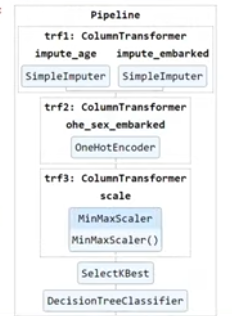

<h2><<<<<</h2>

<h2>Create Pipeline</h2>

In [163]:
# Pipeline is very best tool to automate the flow or chain of steps that need to be flow to get the correct predicted value 
# in the pipeline we create multiple column transformer n then merge it together but we cant create multiple column transformer in this churn dataset
# cuz each time after running 1 column transformer the table index value get chaged n the time of 2nd column transformer it wont get the proper indexed 
# value data so there we create only one column transformer
# now the question will be y to used pipeline cuz we r only using 1 column transformer so 
# column transformer can only do [sacling,encoding,imputing,min-max,ordinalencoding,etc] basically feature engineering part
# in column transformer we can't do model traing n all so here pipe line is used for model traing n predicting data on test values
# n it helps prevent data leakege n this is the one reason we cuz index value in pipeline rather than column name


In [182]:
# 1 single column transformer for this dataset cuz of the issue explained above
preprocess = ColumnTransformer(
    transformers=[
        # StandardScaler: Age, Tenure, Usage Frequency, Payment Delay, Last Interaction
        ('ss_main', StandardScaler(), [0, 2, 3, 5, 9]),

        # RobustScaler: Support Calls
        ('rs_supportcalls', RobustScaler(), [4]),

        # MinMaxScaler: Total Spend
        ('mms_totalspend', MinMaxScaler(), [8]),

        # OneHotEncoder: Gender
        ('ohe_gender', OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32),
         [1]),

        # OrdinalEncoder: Subscription Type, Contract Length
        ('oe_subtype_contractlength',
         OrdinalEncoder(categories=[
             ['Basic', 'Standard', 'Premium'],      # col index 6
             ['Monthly', 'Quarterly', 'Annual']     # col index 7
         ]),
         [6, 7]),
    ],
    remainder='passthrough'
)

In [165]:
from sklearn.pipeline import Pipeline, make_pipeline
# pipe = Pipeline([
#     ('trf1',trf1),
#     ('trf2',trf2),
#     ('trf3',trf3),
#     ('trf4',trf4),
#     ('trf5',trf5),
#     ('trf6',trf6),
# ])

pipe = Pipeline([
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000))
])


<h2>Pipeline Vs make_pipelinr</h2>
Pipeline requires naming of steps, make_pipeline does not.

(Same applies to ColumnTransformer vs make_column_transformer)

In [166]:
# Alternate Syntax
# pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5,trf6)

In [167]:
# train
pipe.fit(x_train,y_train)
# x_train.dtypes


D:\ML\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_main', StandardScaler(),
                                                  [0, 2, 3, 5, 9]),
                                                 ('rs_supportcalls',
                                                  RobustScaler(), [4]),
                                                 ('mms_totalspend',
                                                  MinMaxScaler(), [8]),
                                                 ('ohe_gender',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'numpy.int32'>,
                                                                sparse_output=False),
                                                  [1]),
                                                 ('oe_subtype_contractlength',
                                                  OrdinalEncoder(categories=[['Basic',
                                                                              'Standard',
                                                                              'Premium'],
                                                                             ['Monthly',
                                                                              'Quarterly',
                                                                              'Annual']]),
                                                  [6, 7])])),
                ('model', LogisticRegression(max_iter=1000))])

<h3>Explore the Pipeline</h3>

In [169]:
# Name the steps
pipe.named_steps

{'preprocess': ColumnTransformer(remainder='passthrough',
                   transformers=[('ss_main', StandardScaler(), [0, 2, 3, 5, 9]),
                                 ('rs_supportcalls', RobustScaler(), [4]),
                                 ('mms_totalspend', MinMaxScaler(), [8]),
                                 ('ohe_gender',
                                  OneHotEncoder(drop='first',
                                                dtype=<class 'numpy.int32'>,
                                                sparse_output=False),
                                  [1]),
                                 ('oe_subtype_contractlength',
                                  OrdinalEncoder(categories=[['Basic',
                                                              'Standard',
                                                              'Premium'],
                                                             ['Monthly',
                                                            

In [168]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [170]:
# Predict
y_pred = pipe.predict(x_test)

In [171]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [176]:
# Accuracy Rate
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8269559364158857

<h2>Cross Validation using Pipeline</h2>
Cross-validation checks how well your model performs on different parts of the data.
It tests the model multiple times using different train/test splits.

Why we use it:
.To get a more reliable accuracy
.To avoid lucky/unlucky train-test splits
.To check if model is overfitting
.To estimate real-world performance

How it works (cv=5):
.Split data into 5 equal parts
.Model trains on 4 parts and tests on the remaining 1
.Repeat this process 5 times, changing the test part each time
.Take the average accuracy
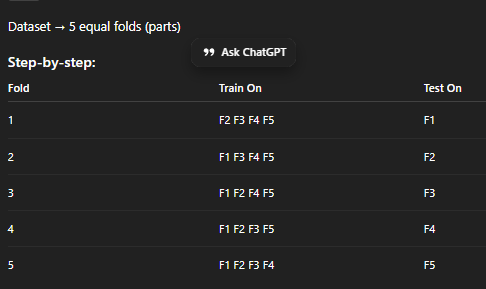

In [175]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,x_train,y_train,cv=5,scoring='accuracy').mean()
# “Run the entire pipeline 5 times on different splits and return the average accuracy.”

D:\ML\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ML\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ML\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ML\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ML\Lib\si

np.float64(0.825680827255044)

In [128]:
x_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
58632,47,Female,38,14,10,19,Premium,Quarterly,674,7
37217,18,Male,20,2,3,14,Basic,Monthly,410,27
55686,25,Female,3,23,8,24,Premium,Quarterly,421,25
51992,43,Male,53,23,10,24,Premium,Monthly,813,29
18622,42,Female,29,12,6,14,Premium,Monthly,210,19


<h2>Exporting the Pipeline</h2>

In [177]:
# export
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

<h1>...</h1>
Basically Pipeline is type of function in which we give a steps wht the model should do n a set of data on which model should get train once this 
function is created or we can say pipeline is created we can call or use it to predict using already splited test data or data we get from production
level like once ur model is connected to website n u start getting real data at that point u just have to call this pipeline(function) which will 
start its step by step process of scaling, encoding based on column like if its numerical column it will use (minmax,satnadrd,robust,etc) n it
it is catogrical column it will use (label,ordinal,onehotencoding) n after that it will run ur given input value in model which ever u seleted or used 
in ur pipeline like(logistic regression, decision tree,etc) n then it will give u the prdicted value so this wht a pipeline is used n help to faster 
the process of manually running n right each step of scaling,encoding,model training each time u get the new input values
<h1>...</h1>
